In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
#dir(Measurement)
Station = Base.classes.station
#dir(Station)

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [11]:
# Perform a query to retrieve the data (?date?) and precipitation scores
data_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()


In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['DATE','Precipitation']
prcp_data = pd.DataFrame(data_query, columns=columns)

In [13]:
# Sort the dataframe by date
prcp_data.sort_values('DATE')

,DATE,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


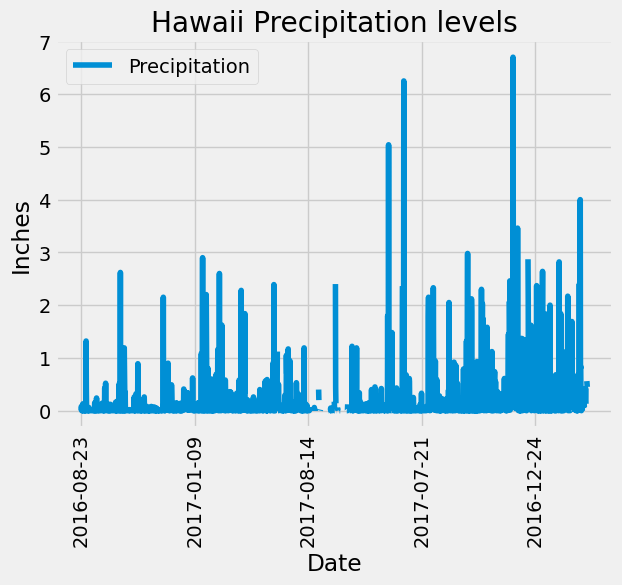

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_data.plot(x="DATE", y="Precipitation", rot=90)
plt.title("Hawaii Precipitation levels")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data.describe()
#? How to get it to show just the PRCP column?
prcp_data["Precipitation"].describe()
#output doesn't look the same as the starter code...

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import func

station_count = session.query(Measurement.station, func.count(Measurement.station).label('station_count'))\
                            .group_by(Measurement.station)\
                            .order_by(func.count(Measurement.station).desc())\
                            .all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temps = session.query(func.min(Measurement.tobs).label('min_temperature'),
                        func.max(Measurement.tobs).label('max_temperature'),
                        func.avg(Measurement.tobs).label('avg_temperature')) \
                 .filter(Measurement.station == 'USC00519281') \
                 .all()
temps

[(54.0, 85.0, 71.66378066378067)]

Query Date:  2016-08-23


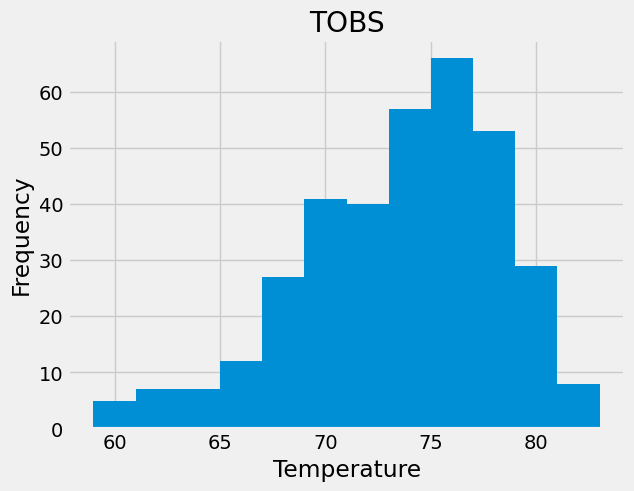

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
tobs_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data (?date?) and tobs
tobs_query = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == 'USC00519281', Measurement.date >= tobs_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['STATION','TOBS']
tobs_data = pd.DataFrame(tobs_query, columns=columns)

# Sort the dataframe by date
tobs_data.sort_values('TOBS')

#Plot the results as a histogram
tobs_data.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Close Session

In [20]:
# Close Session
session.close()